In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# run this command too - just to allow more data to be displayed than default
pd.set_option('display.max_rows', 200)
# this one ensures graphs properly display in the notebook
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#put the data into a dataframe
data = pd.read_csv('Data/Clustering_Results/clusterlabels_cleaneddata3.csv')
#check that is has been read correctly
data

,Unnamed: 0,MSOA,yj_idr_Kmeans_cluster,yj_DB_cluster,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,bicycle_perc,...,log_idr_DB_cluster,log_idr_kmeans_cluster,log_idr_H_cluster,yj_idr_DB_cluster,yj_idr_H_cluster,yj_H_cluster,yj_Kmeans_cluster,yj_Zscore_DB_cluster,yj_Zscore_H_cluster,yj_zscore_Kmeans_cluster
0,1,E02000001,1,0,30.604333,14.649948,18.390805,5.433647,5.538140,5.078370,...,0,1,3,0,2,1,2,0,2,1
1,2,E02000002,1,0,62.403244,6.400966,15.660225,8.212560,14.734300,1.328502,...,0,1,3,0,1,1,2,0,2,1
2,3,E02000003,1,0,68.805425,6.895792,12.778145,19.850187,10.619079,0.881251,...,0,1,3,0,1,1,2,0,2,1
3,4,E02000004,1,0,76.013805,6.368090,10.146956,13.750875,9.972008,1.329601,...,0,1,3,0,1,1,2,0,2,1
4,5,E02000005,1,0,66.069746,6.286509,12.406120,12.294854,15.076495,1.585535,...,0,1,3,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,7197,W02000419,2,0,78.594455,8.073744,0.021191,1.292647,3.390549,2.564103,...,0,0,0,0,0,0,1,0,0,2
7197,7198,W02000420,2,0,89.725659,13.338290,0.148699,0.832714,3.568773,1.501859,...,0,0,0,0,0,2,1,0,1,0
7198,7199,W02000421,0,0,89.238114,24.655573,0.107354,0.339953,1.789229,0.984076,...,0,2,2,0,0,2,1,0,1,0
7199,7200,W02000422,0,-1,82.430213,6.057363,0.064212,4.965753,8.005137,3.381849,...,0,0,0,0,1,0,0,-1,0,2


In [3]:
# list(data) or 
list(data.columns) 

['Unnamed: 0',
 'MSOA',
 'yj_idr_Kmeans_cluster',
 'yj_DB_cluster',
 'HH_owning_cars_perc',
 'work_from_home_perc',
 'underground_metro_perc',
 'train_perc',
 'bus_perc',
 'bicycle_perc',
 'on_foot_perc',
 'avg_time_from_origin_car_UNWEIGHTED',
 'avg_time_car',
 'avg_time_from_origin_bus_UNWEIGHTED',
 'avg_time_bus',
 'avg_time_from_origin_rail_UNWEIGHTED',
 'avg_time_rail',
 'car_perc',
 'log_zscore_DB_cluster',
 'log_zscore_kmeans_cluster',
 'log_zscore_H_cluster',
 'log_range_DB_cluster',
 'log_range_H_cluster',
 'log_range_kmeans_cluster',
 'log_idr_DB_cluster',
 'log_idr_kmeans_cluster',
 'log_idr_H_cluster',
 'yj_idr_DB_cluster',
 'yj_idr_H_cluster',
 'yj_H_cluster',
 'yj_Kmeans_cluster',
 'yj_Zscore_DB_cluster',
 'yj_Zscore_H_cluster',
 'yj_zscore_Kmeans_cluster']

In [4]:
cluster_data = data[['yj_idr_Kmeans_cluster',
 'yj_DB_cluster',
 'log_zscore_DB_cluster',
 'log_zscore_kmeans_cluster',
 'log_zscore_H_cluster',
 'log_range_DB_cluster',
 'log_range_H_cluster',
 'log_range_kmeans_cluster',
 'log_idr_DB_cluster',
 'log_idr_kmeans_cluster',
 'log_idr_H_cluster',
 'yj_idr_DB_cluster',
 'yj_idr_H_cluster',
 'yj_H_cluster',
 'yj_Kmeans_cluster',
 'yj_Zscore_DB_cluster',
 'yj_Zscore_H_cluster',
 'yj_zscore_Kmeans_cluster']]
cluster_data

,yj_idr_Kmeans_cluster,yj_DB_cluster,log_zscore_DB_cluster,log_zscore_kmeans_cluster,log_zscore_H_cluster,log_range_DB_cluster,log_range_H_cluster,log_range_kmeans_cluster,log_idr_DB_cluster,log_idr_kmeans_cluster,log_idr_H_cluster,yj_idr_DB_cluster,yj_idr_H_cluster,yj_H_cluster,yj_Kmeans_cluster,yj_Zscore_DB_cluster,yj_Zscore_H_cluster,yj_zscore_Kmeans_cluster
0,1,0,-1,3,0,0,1,2,0,1,3,0,2,1,2,0,2,1
1,1,0,0,3,0,0,1,2,0,1,3,0,1,1,2,0,2,1
2,1,0,0,3,0,0,1,2,0,1,3,0,1,1,2,0,2,1
3,1,0,0,4,0,0,1,2,0,1,3,0,1,1,2,0,2,1
4,1,0,0,3,0,0,1,2,0,1,3,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,2,0,0,2,1,0,2,1,0,0,0,0,0,0,1,0,0,2
7197,2,0,0,1,2,0,0,0,0,0,0,0,0,2,1,0,1,0
7198,0,0,0,1,1,0,0,0,0,2,2,0,0,2,1,0,1,0
7199,0,-1,0,2,3,0,2,1,0,0,0,0,1,0,0,-1,0,2


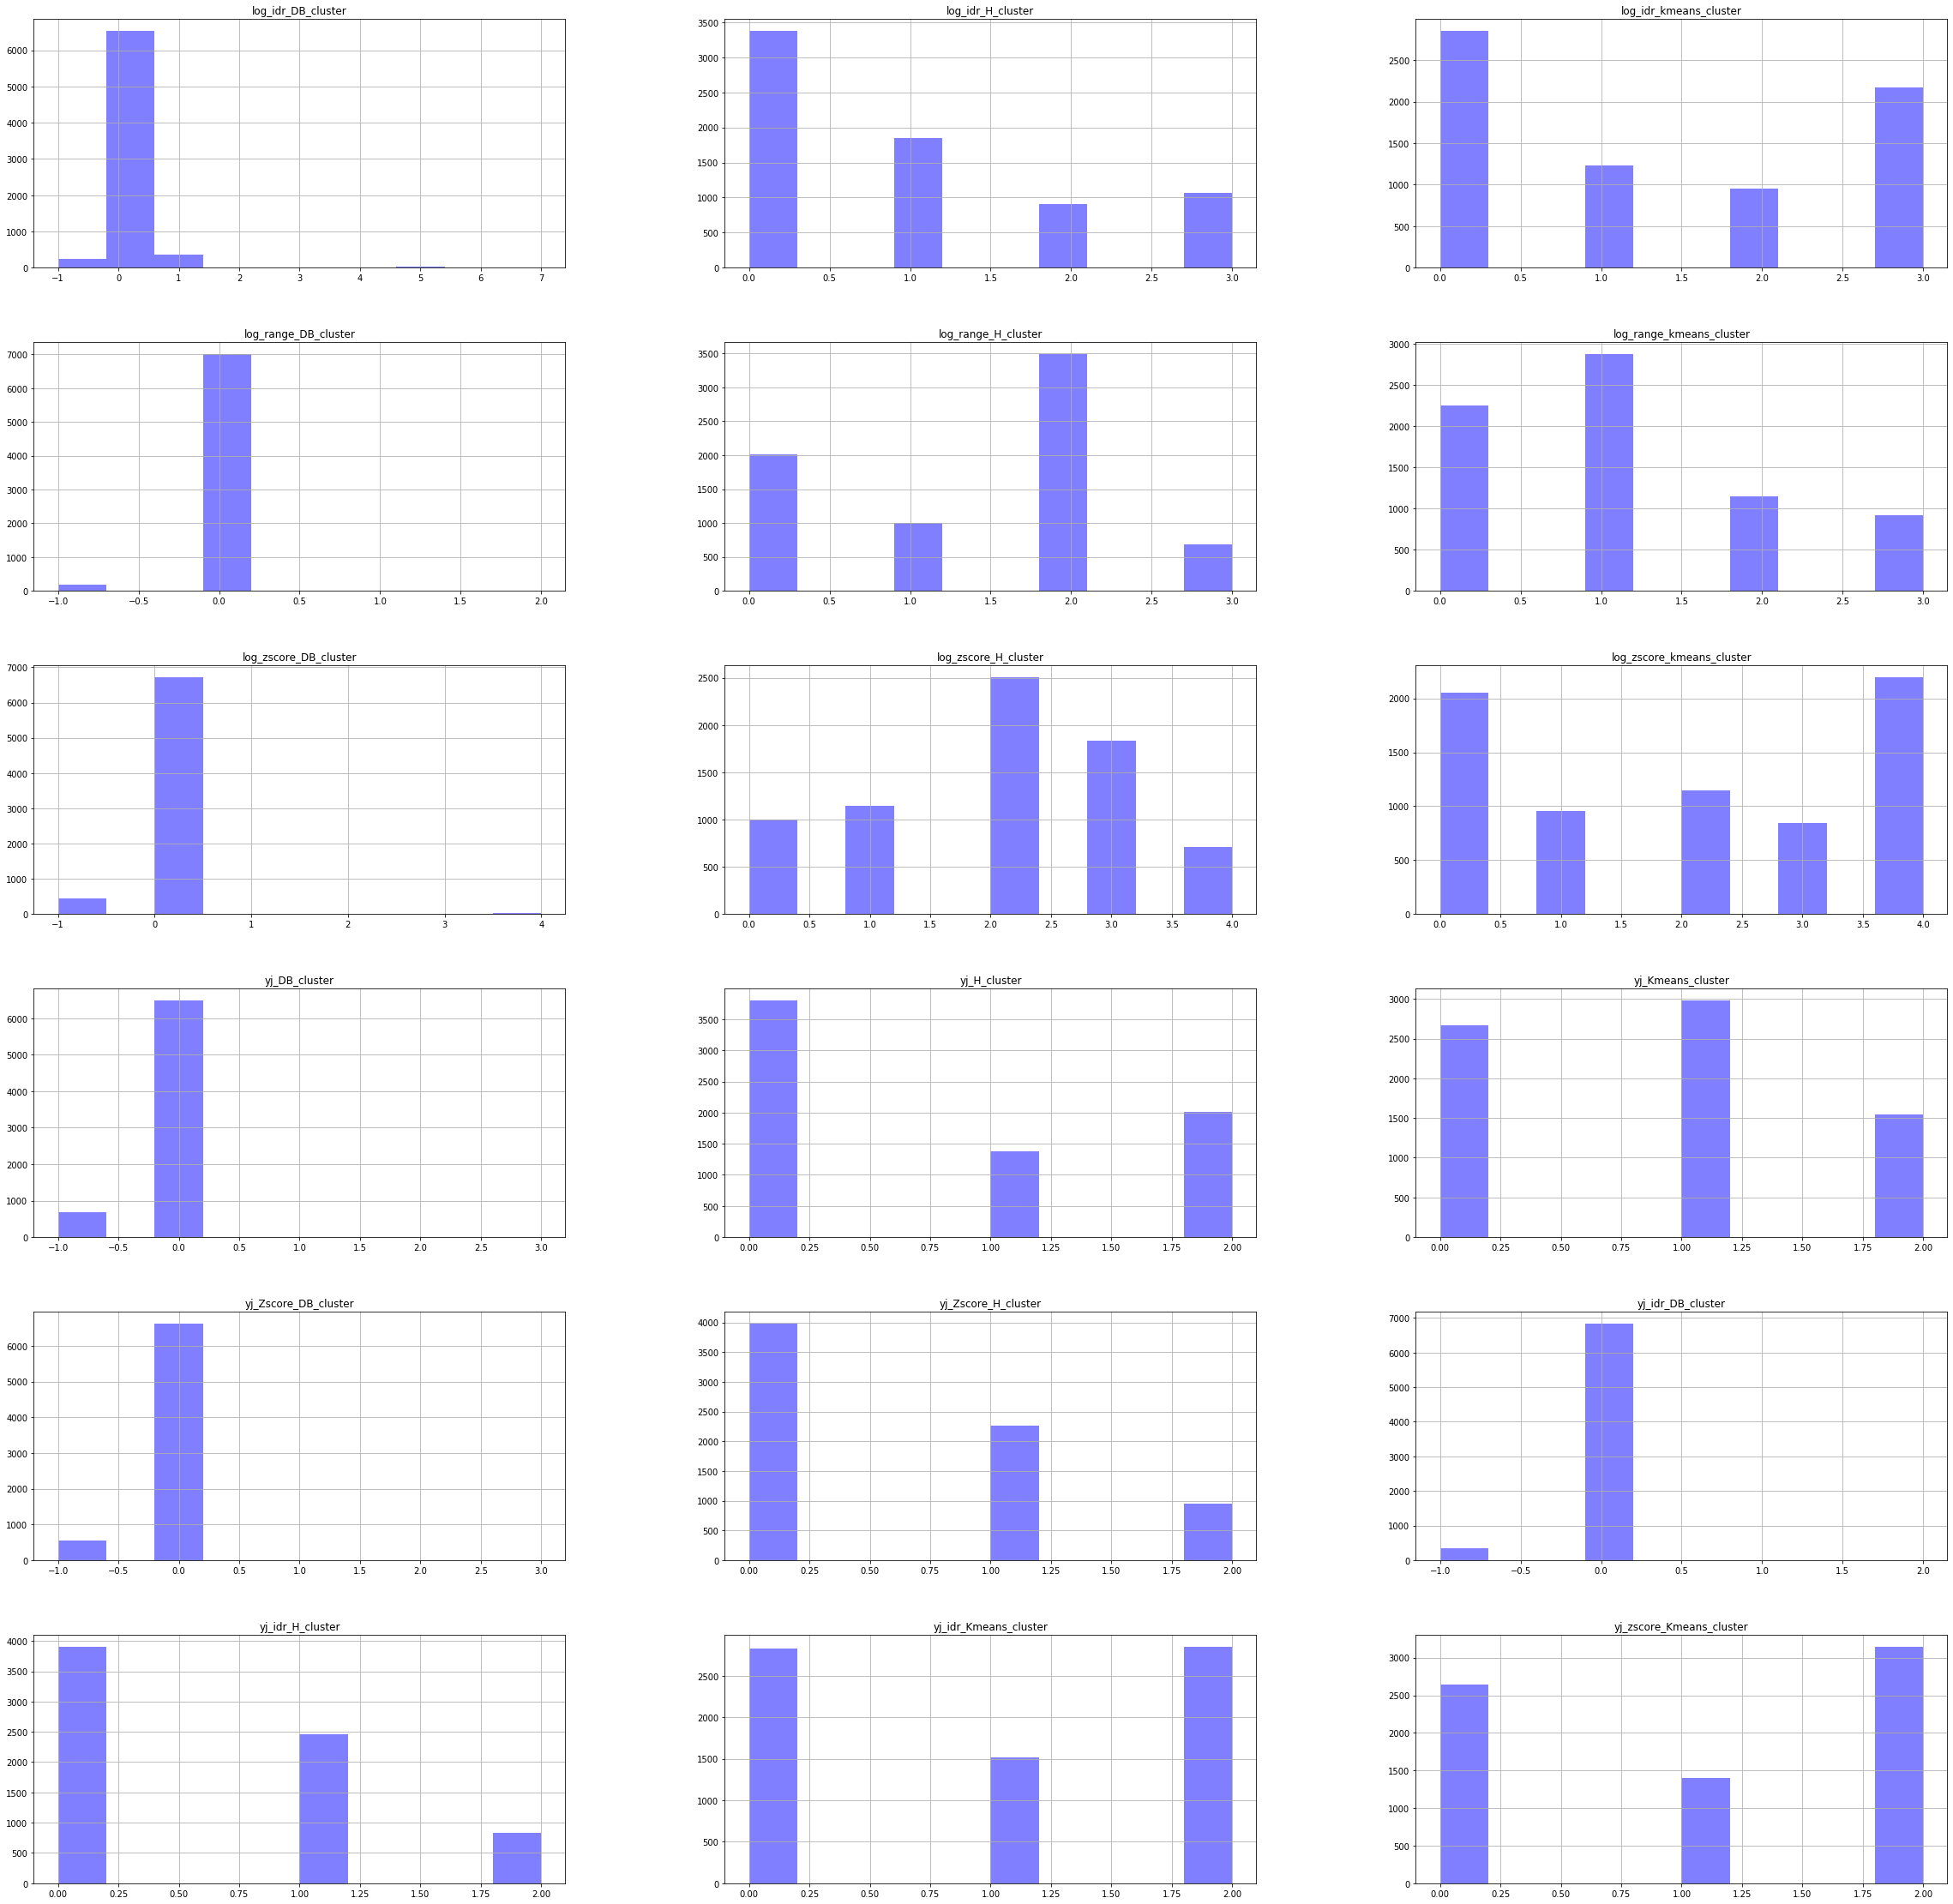

In [5]:
#plot the results
cluster_data.hist(layout=(6, 3), figsize=(40, 40), color='blue', alpha=.5);
plt.savefig('Plots/All_Clustering_Algorithms.png')

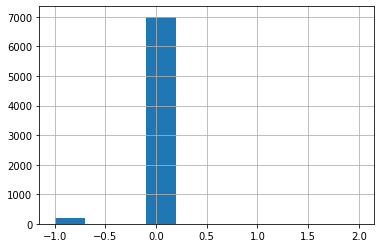

In [6]:
cluster_data['log_range_DB_cluster'].hist()
plt.savefig('Plots/log_range_DB_hist.png')

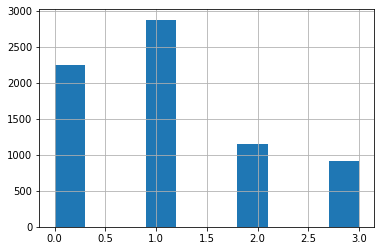

In [7]:
cluster_data['log_range_kmeans_cluster'].hist()
plt.savefig('Plots/log_range_kmeans_hist.png')

In [8]:
# drop the clusters with bad distributions (bad to be defined more explicitly later...or not. Whatever)
data.drop(['Unnamed: 0', 'log_idr_DB_cluster', 'log_zscore_DB_cluster', 'yj_Zscore_DB_cluster',
           'yj_idr_DB_cluster', 'log_range_DB_cluster', 'yj_Zscore_H_cluster', 
           'yj_DB_cluster'], axis=1, inplace=True)

list(data.columns) 

['MSOA',
 'yj_idr_Kmeans_cluster',
 'HH_owning_cars_perc',
 'work_from_home_perc',
 'underground_metro_perc',
 'train_perc',
 'bus_perc',
 'bicycle_perc',
 'on_foot_perc',
 'avg_time_from_origin_car_UNWEIGHTED',
 'avg_time_car',
 'avg_time_from_origin_bus_UNWEIGHTED',
 'avg_time_bus',
 'avg_time_from_origin_rail_UNWEIGHTED',
 'avg_time_rail',
 'car_perc',
 'log_zscore_kmeans_cluster',
 'log_zscore_H_cluster',
 'log_range_H_cluster',
 'log_range_kmeans_cluster',
 'log_idr_kmeans_cluster',
 'log_idr_H_cluster',
 'yj_idr_H_cluster',
 'yj_H_cluster',
 'yj_Kmeans_cluster',
 'yj_zscore_Kmeans_cluster']

In [9]:
# create list of columns
cluster_columns = ['yj_idr_Kmeans_cluster', 'log_zscore_kmeans_cluster', 'log_zscore_H_cluster', 'log_range_H_cluster',
           'log_range_kmeans_cluster', 'log_idr_kmeans_cluster', 'log_idr_H_cluster', 'yj_idr_H_cluster',
           'yj_H_cluster', 'yj_Kmeans_cluster', 'yj_zscore_Kmeans_cluster']

cluster_columns[1]    

'log_zscore_kmeans_cluster'

## log_zscore_kmeans_cluster

In [10]:
x1 = data.groupby(cluster_columns[1], as_index=False).mean()
# remove the cluster results (keep the one you are grouping by!)
x1.drop(['yj_idr_Kmeans_cluster','log_zscore_H_cluster','log_range_H_cluster','log_range_kmeans_cluster',
        'log_idr_kmeans_cluster', 'log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
        'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)
x1

,log_zscore_kmeans_cluster,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,bicycle_perc,on_foot_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,0,85.796474,11.577208,1.382246,6.558816,3.694545,1.845764,6.598419,116.008038,12.161136,259.760374,28.377228,140.433799,59.239024,66.898794
1,1,88.277402,18.087316,0.178076,2.366583,1.783898,1.718948,7.116174,150.537075,17.663342,318.928318,43.256900,195.111374,124.239169,67.304160
2,2,73.189126,8.717421,0.798936,1.669481,6.482721,2.535251,12.247600,177.022714,12.202996,379.365516,26.254810,211.617091,98.326565,65.507377
3,3,53.954930,9.435518,22.650719,12.061486,15.078892,4.314984,9.913094,108.749005,9.728451,245.511218,28.840152,114.873853,20.677166,24.493601
4,4,68.036325,7.129910,0.517174,2.737929,10.537883,3.328457,12.542207,119.735413,10.204902,268.795462,24.163261,144.806375,54.203531,61.212873


In [11]:
#change from wide to long for plotting
y1 = x1.unstack().reset_index() 
y1.head()

,level_0,level_1,0
0,log_zscore_kmeans_cluster,0,0.0
1,log_zscore_kmeans_cluster,1,1.0
2,log_zscore_kmeans_cluster,2,2.0
3,log_zscore_kmeans_cluster,3,3.0
4,log_zscore_kmeans_cluster,4,4.0


In [12]:
# remove the top rows with the cluster name
y1 = y1[y1.level_0 != cluster_columns[1]]
# rename columns 
y1.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)


y1.head()

,variable,cluster,0
5,HH_owning_cars_perc,0,85.796474
6,HH_owning_cars_perc,1,88.277402
7,HH_owning_cars_perc,2,73.189126
8,HH_owning_cars_perc,3,53.954930
9,HH_owning_cars_perc,4,68.036325


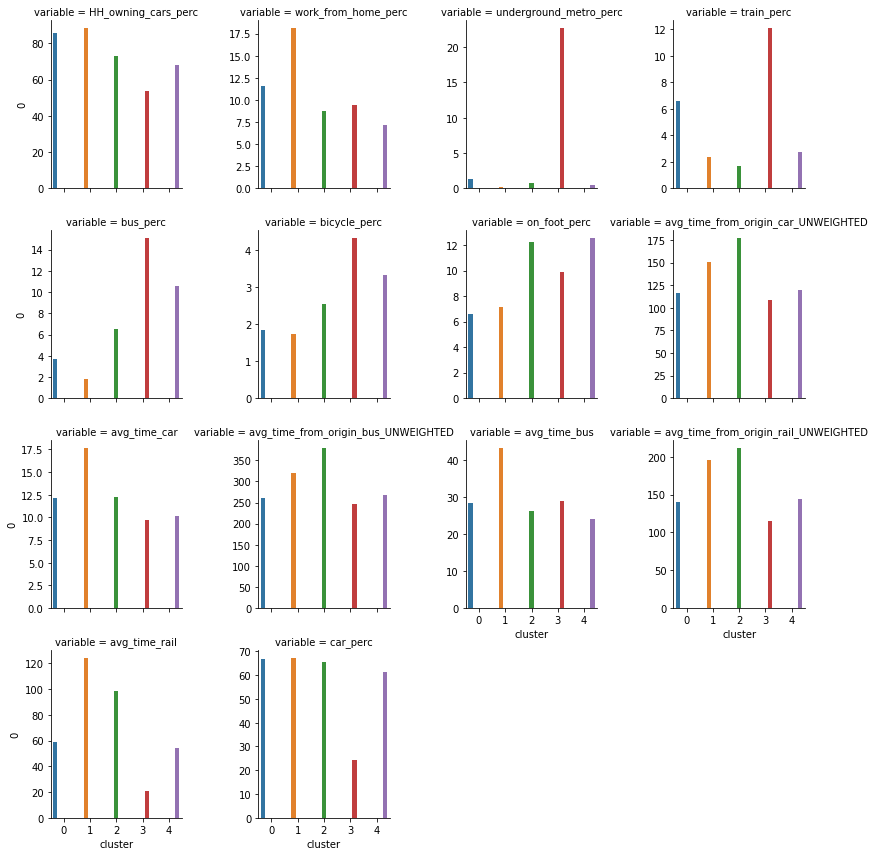

In [13]:
import seaborn as sns
g = sns.catplot(data=y1, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

In [14]:
g.savefig("Plots/log_zscore_kmeans.png")

In [15]:
cluster_columns[2]    

'log_zscore_H_cluster'

## log_zscore_H_cluster

In [16]:
x2 = data.groupby(cluster_columns[2], as_index=False).mean()
# remove the cluster results
x2.drop(['log_zscore_kmeans_cluster','yj_idr_Kmeans_cluster','log_range_H_cluster','log_range_kmeans_cluster',
         'log_idr_kmeans_cluster', 'log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)
x2

,log_zscore_H_cluster,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,bicycle_perc,on_foot_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,0,59.938239,9.627481,21.076296,12.730231,13.501092,3.638580,8.024879,108.977242,9.417471,247.278622,28.604685,115.416473,21.563377,29.335628
1,1,76.345313,11.345534,0.807997,1.390027,5.519182,2.470907,11.243403,178.381278,13.997513,375.320303,32.525943,218.630826,124.384974,65.307223
2,2,85.555246,12.672644,0.471472,5.203389,3.489523,1.830066,6.817456,124.493416,13.224048,276.319376,31.196385,152.073502,70.570332,68.043812
3,3,68.301935,7.805035,0.545315,2.985443,10.564245,3.424683,13.351319,116.642291,10.756372,262.704667,24.276624,141.581519,57.193885,59.458402
4,4,73.743575,8.454083,0.022627,1.423294,6.532132,2.751166,10.992907,141.377000,11.487148,308.189386,26.183412,176.925655,8.553021,67.817218


In [17]:
#change from wide to long for plotting
y2 = x2.unstack().reset_index() 

In [18]:
# remove the top rows with the cluster name
y2 = y2[y2.level_0 != cluster_columns[2]]
# rename columns 
y2.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y2.head()

,variable,cluster,0
5,HH_owning_cars_perc,0,59.938239
6,HH_owning_cars_perc,1,76.345313
7,HH_owning_cars_perc,2,85.555246
8,HH_owning_cars_perc,3,68.301935
9,HH_owning_cars_perc,4,73.743575


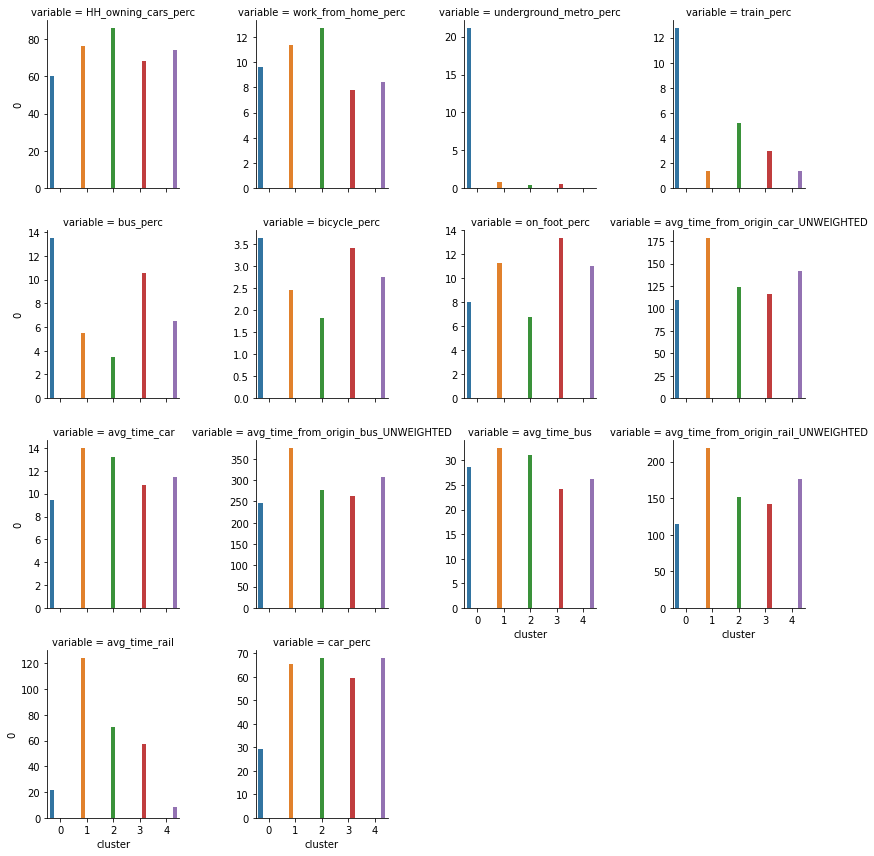

In [19]:
g = sns.catplot(data=y2, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

In [20]:
g.savefig("Plots/log_zscore_heirarchical.png")

In [21]:
cluster_columns[3]    

'log_range_H_cluster'

## log_range_H_cluster

In [22]:
x3 = data.groupby(cluster_columns[3], as_index=False).mean()
# remove the cluster results
x3.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster' , 'yj_idr_Kmeans_cluster','log_range_kmeans_cluster',
         'log_idr_kmeans_cluster', 'log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)
x3

,log_range_H_cluster,HH_owning_cars_perc,work_from_home_perc,underground_metro_perc,train_perc,bus_perc,bicycle_perc,on_foot_perc,avg_time_from_origin_car_UNWEIGHTED,avg_time_car,avg_time_from_origin_bus_UNWEIGHTED,avg_time_bus,avg_time_from_origin_rail_UNWEIGHTED,avg_time_rail,car_perc
0,0,84.759116,14.380386,0.697387,3.698631,3.507866,1.623714,7.052263,151.259980,14.776114,324.289901,34.172579,186.328797,101.688540,67.467985
1,1,60.186971,9.633757,20.999290,12.678128,13.403158,3.610942,7.957368,109.103104,9.466247,247.645278,28.697045,115.605450,21.709466,29.648282
2,2,73.751109,8.643209,0.481647,3.650799,7.917212,2.984726,11.635555,122.710542,11.231844,274.291501,26.190726,148.792373,62.893221,62.915028
3,3,74.026323,8.582589,0.018337,1.332756,6.440062,2.876361,10.896862,141.493833,11.662447,307.589886,26.358407,177.116226,6.101566,67.863568


In [23]:
#change from wide to long for plotting
y3 = x3.unstack().reset_index() 

In [24]:
# remove the top rows with the cluster name
y3 = y3[y3.level_0 != cluster_columns[3]]
# rename columns 
y3.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y3.head()

,variable,cluster,0
4,HH_owning_cars_perc,0,84.759116
5,HH_owning_cars_perc,1,60.186971
6,HH_owning_cars_perc,2,73.751109
7,HH_owning_cars_perc,3,74.026323
8,work_from_home_perc,0,14.380386


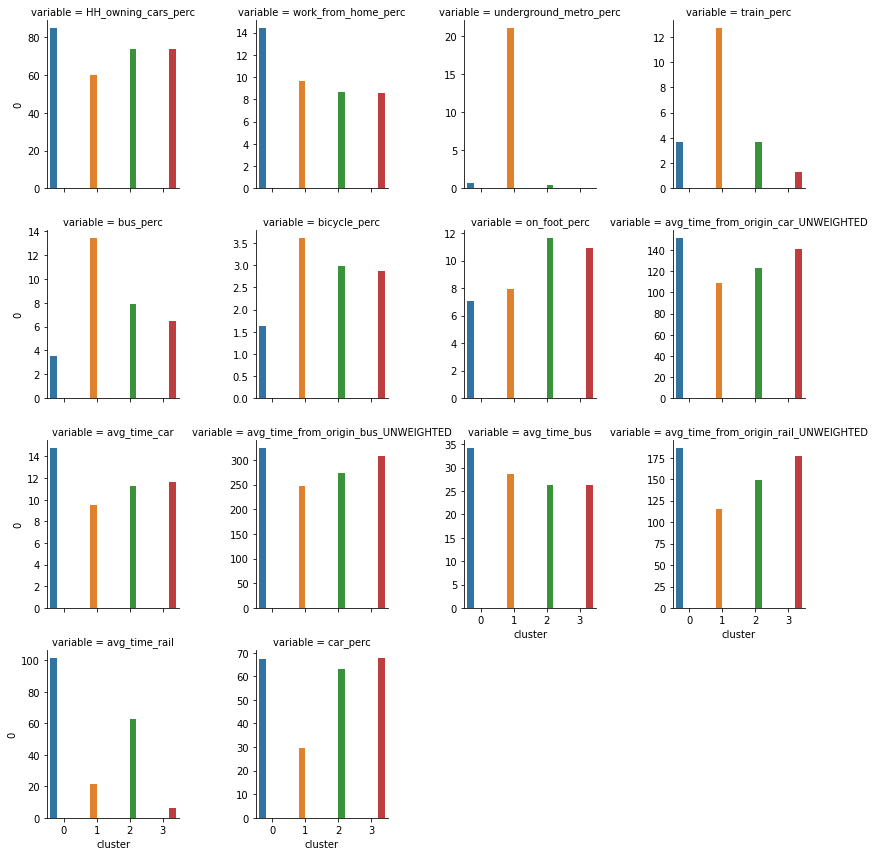

In [25]:
g = sns.catplot(data=y3, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

In [26]:
g.savefig("Plots/log_range_heirarchical.png")

In [27]:
cluster_columns[4]  

'log_range_kmeans_cluster'

## log_range_kmeans_cluster

In [28]:
x4 = data.groupby(cluster_columns[4], as_index=False).mean()
# remove the cluster results
x4.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster', 'log_range_H_cluster', 'yj_idr_Kmeans_cluster',
         'log_idr_kmeans_cluster', 'log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)

#change from wide to long for plotting
y4 = x4.unstack().reset_index() 

# remove the top rows with the cluster name
y4 = y4[y4.level_0 != cluster_columns[4]]
# rename columns 
y4.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y4.head()

,variable,cluster,0
4,HH_owning_cars_perc,0,87.132471
5,HH_owning_cars_perc,1,72.244313
6,HH_owning_cars_perc,2,60.448453
7,HH_owning_cars_perc,3,71.879207
8,work_from_home_perc,0,14.799412


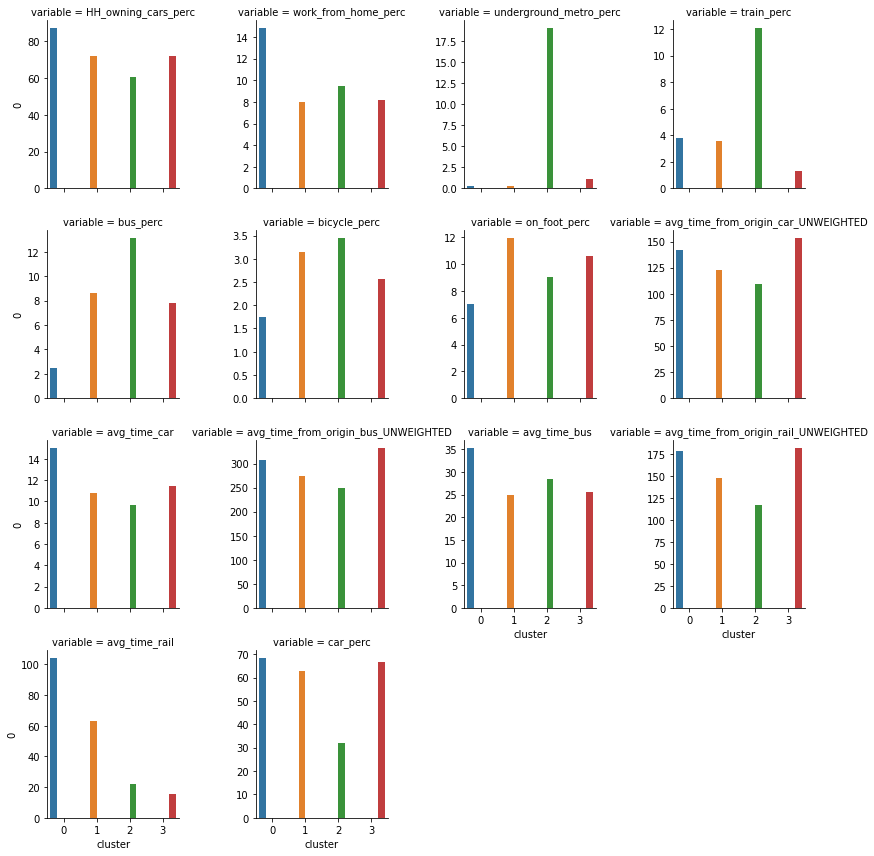

In [29]:
g = sns.catplot(data=y4, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

g.savefig("Plots/log_range_kmeans.png")

In [30]:
cluster_columns[5]  

'log_idr_kmeans_cluster'

## log_idr_kmeans_cluster

In [31]:
x5 = data.groupby(cluster_columns[5], as_index=False).mean()
# remove the cluster results
x5.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster', 'log_range_H_cluster', 'yj_idr_Kmeans_cluster',
        'log_range_kmeans_cluster', 'log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)

#change from wide to long for plotting
y5 = x5.unstack().reset_index() 

# remove the top rows with the cluster name
y5 = y5[y5.level_0 != cluster_columns[5]]
# rename columns 
y5.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y5.head()

,variable,cluster,0
4,HH_owning_cars_perc,0,76.951729
5,HH_owning_cars_perc,1,62.236960
6,HH_owning_cars_perc,2,75.689231
7,HH_owning_cars_perc,3,79.250193
8,work_from_home_perc,0,10.270041


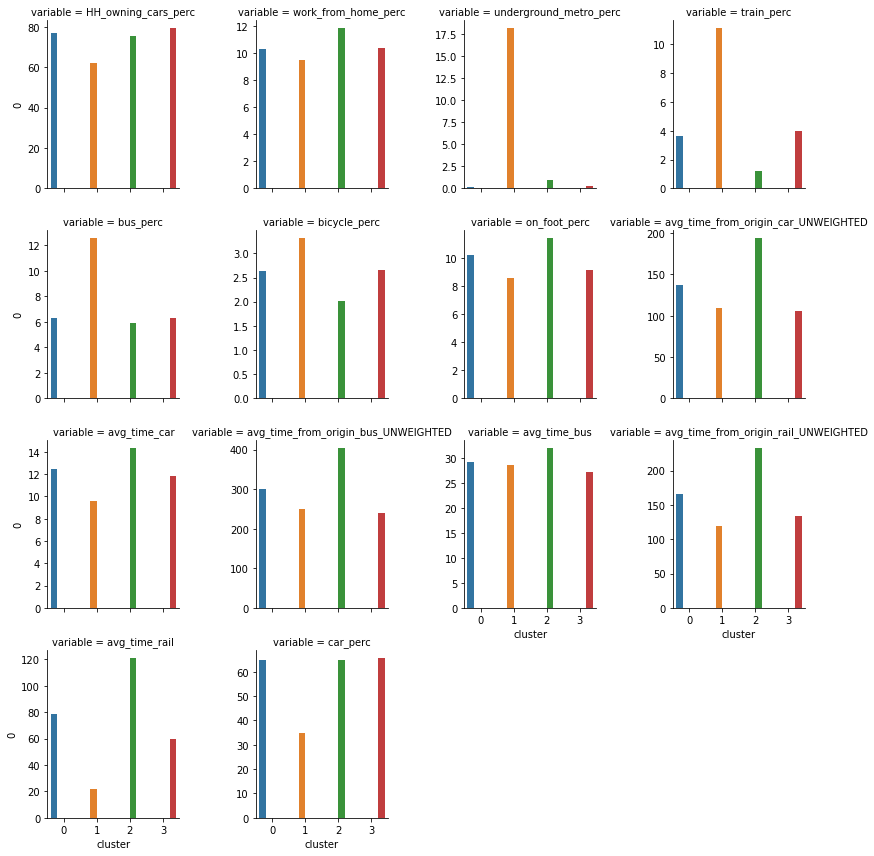

In [32]:
g = sns.catplot(data=y5, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

g.savefig("Plots/log_idr_kmeans.png")

In [33]:
cluster_columns[6]  

'log_idr_H_cluster'

## log_idr_H_cluster

In [34]:
x6 = data.groupby(cluster_columns[6], as_index=False).mean()
# remove the cluster results
x6.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster', 'log_range_H_cluster', 'yj_idr_Kmeans_cluster',
        'log_range_kmeans_cluster', 'log_idr_kmeans_cluster','yj_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)

#change from wide to long for plotting
y6 = x6.unstack().reset_index() 

# remove the top rows with the cluster name
y6 = y6[y6.level_0 != cluster_columns[6]]
# rename columns 
y6.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y6.head()

,variable,cluster,0
4,HH_owning_cars_perc,0,77.033673
5,HH_owning_cars_perc,1,79.240078
6,HH_owning_cars_perc,2,76.278238
7,HH_owning_cars_perc,3,59.853490
8,work_from_home_perc,0,10.202795


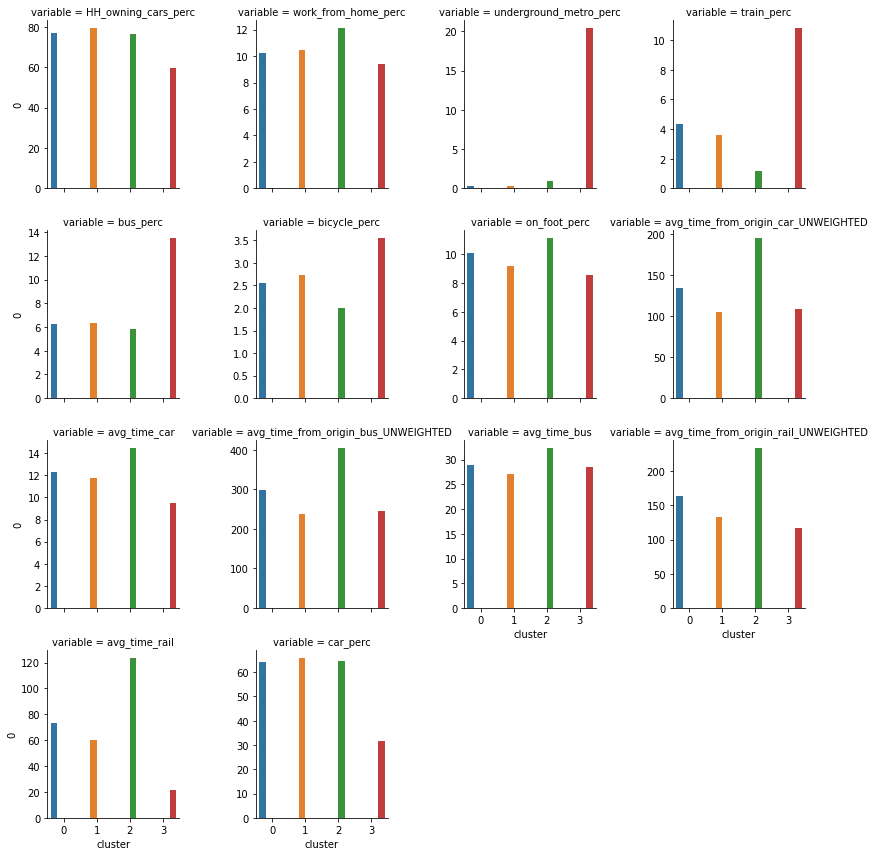

In [35]:
g = sns.catplot(data=y6, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

g.savefig("Plots/log_idr_Heirarchical.png")

In [36]:
cluster_columns[7]

'yj_idr_H_cluster'

## yj_idr_H_cluster

In [37]:
x7 = data.groupby(cluster_columns[7], as_index=False).mean()
# remove the cluster results
x7.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster', 'log_range_H_cluster', 'yj_idr_Kmeans_cluster',
        'log_range_kmeans_cluster', 'log_idr_kmeans_cluster','log_idr_H_cluster','yj_H_cluster','yj_Kmeans_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)

#change from wide to long for plotting
y7 = x7.unstack().reset_index() 

# remove the top rows with the cluster name
y7 = y7[y7.level_0 != cluster_columns[7]]
# rename columns 
y7.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y7.head()

,variable,cluster,0
3,HH_owning_cars_perc,0,81.840738
4,HH_owning_cars_perc,1,71.757227
5,HH_owning_cars_perc,2,52.026525
6,work_from_home_perc,0,10.374612
7,work_from_home_perc,1,10.599814


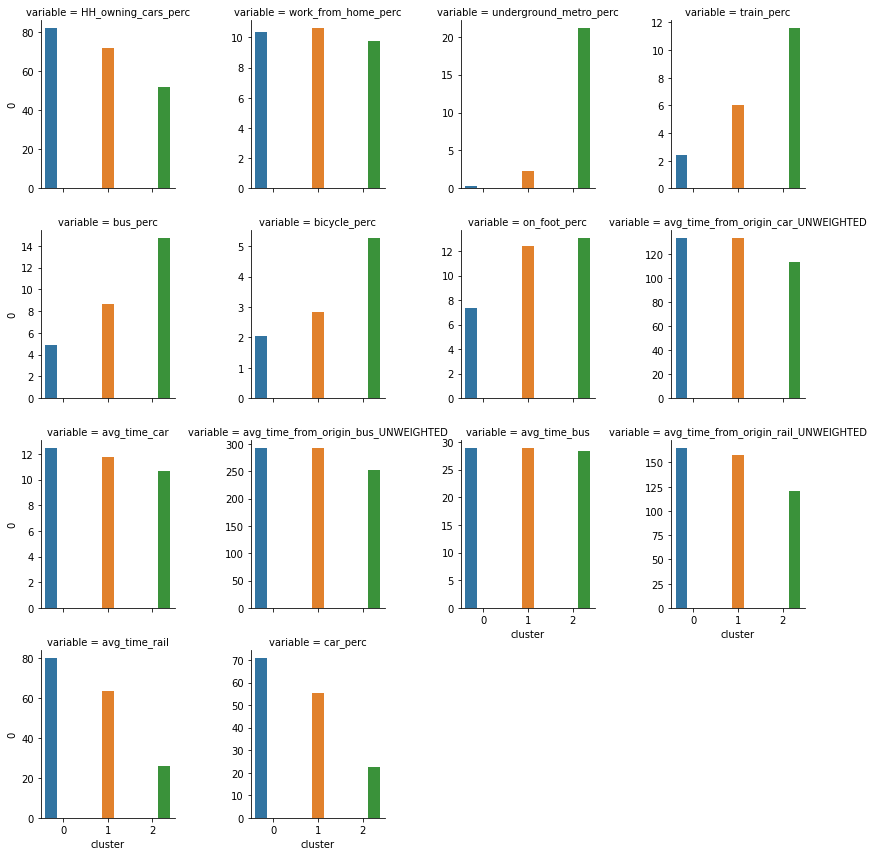

In [38]:
g = sns.catplot(data=y7, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

g.savefig("Plots/yj_idr_Heirarchical.png")

In [39]:
cluster_columns[8]

'yj_H_cluster'

## yj_H_cluster   (Range)

In [40]:
x8 = data.groupby(cluster_columns[8], as_index=False).mean()
# remove the cluster results
x8.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster', 'log_range_H_cluster', 'yj_idr_Kmeans_cluster',
        'log_range_kmeans_cluster', 'log_idr_kmeans_cluster','log_idr_H_cluster','yj_idr_H_cluster','yj_Kmeans_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)

#change from wide to long for plotting
y8 = x8.unstack().reset_index() 

# remove the top rows with the cluster name
y8 = y8[y8.level_0 != cluster_columns[8]]
# rename columns 
y8.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y8.head()

,variable,cluster,0
3,HH_owning_cars_perc,0,73.251382
4,HH_owning_cars_perc,1,61.818516
5,HH_owning_cars_perc,2,87.122018
6,work_from_home_perc,0,8.511356
7,work_from_home_perc,1,9.104273


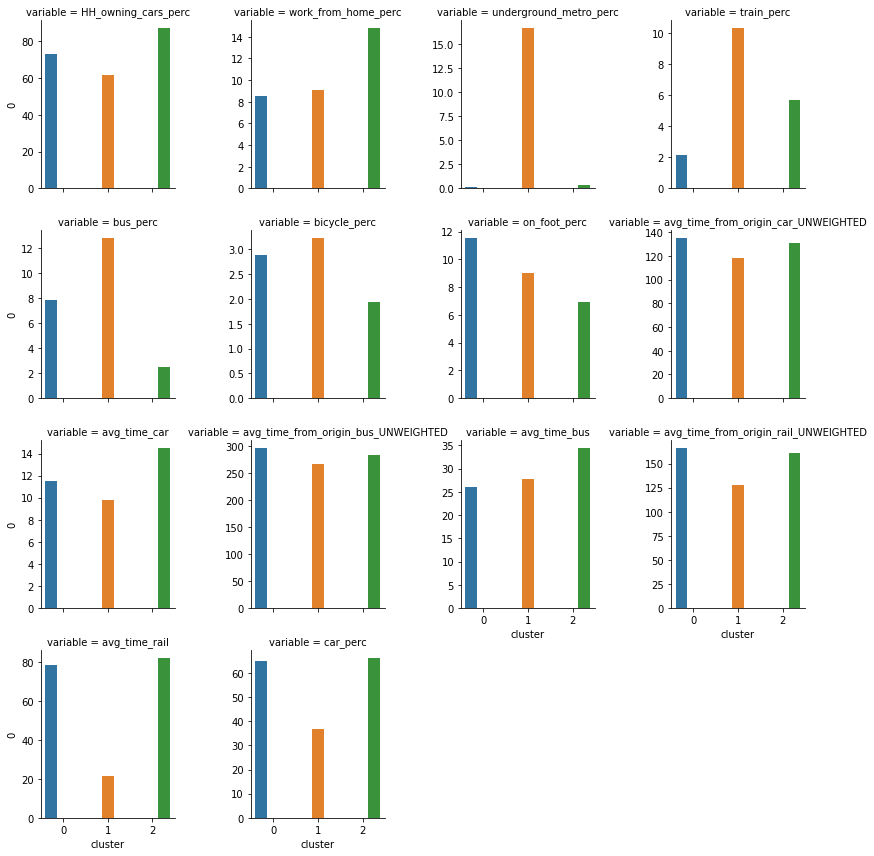

In [41]:
g = sns.catplot(data=y8, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

g.savefig("Plots/yj_range_Heirarchical.png")

In [42]:
cluster_columns[9]

'yj_Kmeans_cluster'

## yj_Kmeans_cluster

In [43]:
x9 = data.groupby(cluster_columns[9], as_index=False).mean()
# remove the cluster results
x9.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster', 'log_range_H_cluster', 'yj_idr_Kmeans_cluster',
        'log_range_kmeans_cluster', 'log_idr_kmeans_cluster','log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster',
         'yj_zscore_Kmeans_cluster'], axis=1, inplace=True)

#change from wide to long for plotting
y9 = x9.unstack().reset_index() 

# remove the top rows with the cluster name
y9 = y9[y9.level_0 != cluster_columns[9]]
# rename columns 
y9.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y9.head()

,variable,cluster,0
3,HH_owning_cars_perc,0,68.861800
4,HH_owning_cars_perc,1,87.061493
5,HH_owning_cars_perc,2,62.159493
6,work_from_home_perc,0,7.612534
7,work_from_home_perc,1,13.530328


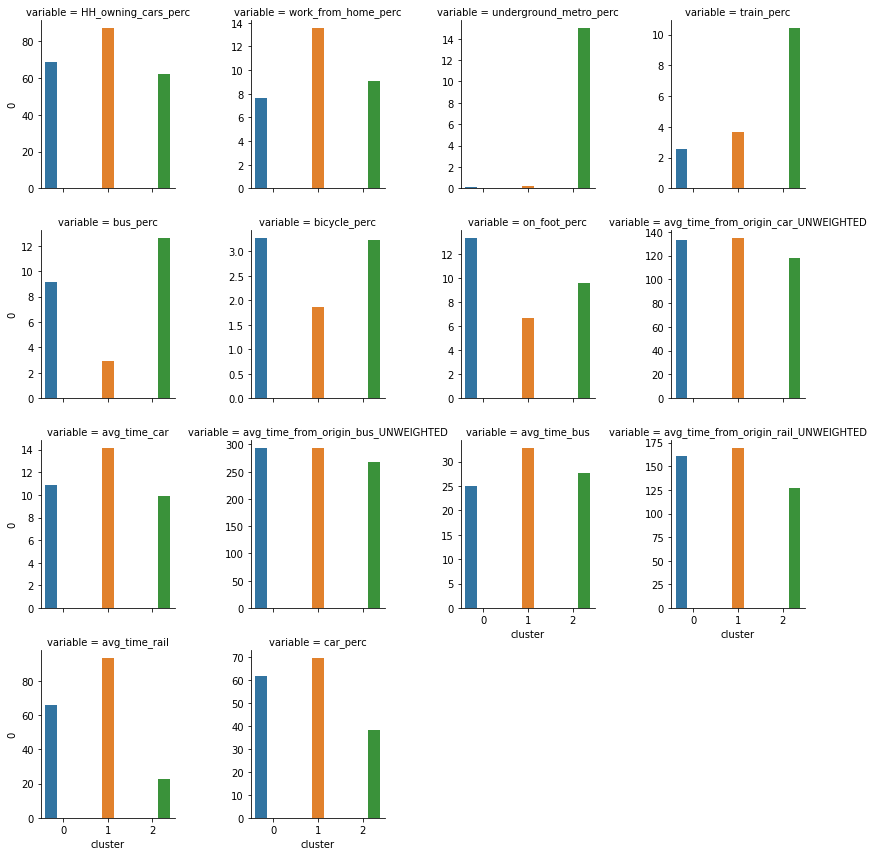

In [44]:
g = sns.catplot(data=y9, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

g.savefig("Plots/yj_range_kmeans.png")

In [45]:
cluster_columns[10]

'yj_zscore_Kmeans_cluster'

In [46]:
x10 = data.groupby(cluster_columns[10], as_index=False).mean()
# remove the cluster results
x10.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster', 'log_range_H_cluster', 'yj_idr_Kmeans_cluster',
        'log_range_kmeans_cluster', 'log_idr_kmeans_cluster','log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster',
         'yj_Kmeans_cluster'], axis=1, inplace=True)

#change from wide to long for plotting
y10 = x10.unstack().reset_index() 

# remove the top rows with the cluster name
y10 = y10[y10.level_0 != cluster_columns[10]]
# rename columns 
y10.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y10.head()

,variable,cluster,0
3,HH_owning_cars_perc,0,87.358156
4,HH_owning_cars_perc,1,59.504516
5,HH_owning_cars_perc,2,71.431032
6,work_from_home_perc,0,14.337870
7,work_from_home_perc,1,9.123347


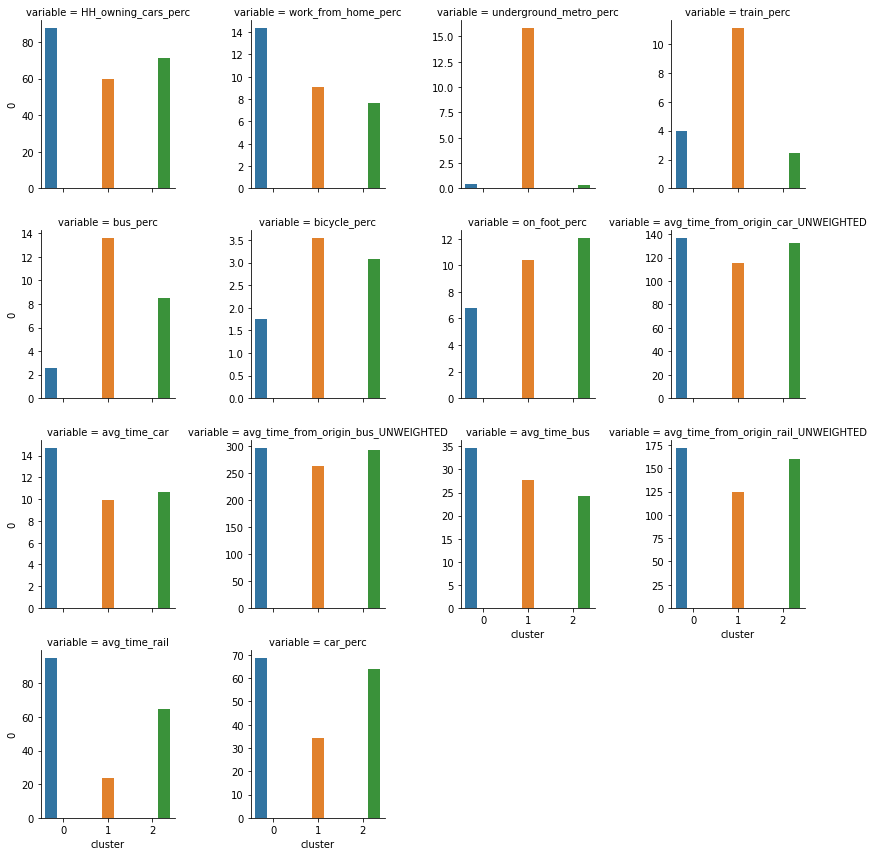

In [47]:
g = sns.catplot(data=y10, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

g.savefig("Plots/yj_zscore_kmeans.png")

In [48]:
cluster_columns[0]

'yj_idr_Kmeans_cluster'

In [49]:
x0 = data.groupby(cluster_columns[0], as_index=False).mean()
# remove the cluster results
x0.drop(['log_zscore_kmeans_cluster','log_zscore_H_cluster', 'log_range_H_cluster', 'yj_zscore_Kmeans_cluster',
        'log_range_kmeans_cluster', 'log_idr_kmeans_cluster','log_idr_H_cluster','yj_idr_H_cluster','yj_H_cluster',
         'yj_Kmeans_cluster'], axis=1, inplace=True)

#change from wide to long for plotting
y0 = x0.unstack().reset_index() 

# remove the top rows with the cluster name
y0 = y0[y0.level_0 != cluster_columns[0]]
# rename columns 
y0.rename(columns={'level_0':'variable', 'level_1':'cluster'}, inplace=True)

y0.head()

,variable,cluster,0
3,HH_owning_cars_perc,0,74.998873
4,HH_owning_cars_perc,1,58.861214
5,HH_owning_cars_perc,2,83.500622
6,work_from_home_perc,0,10.734167
7,work_from_home_perc,1,9.662998


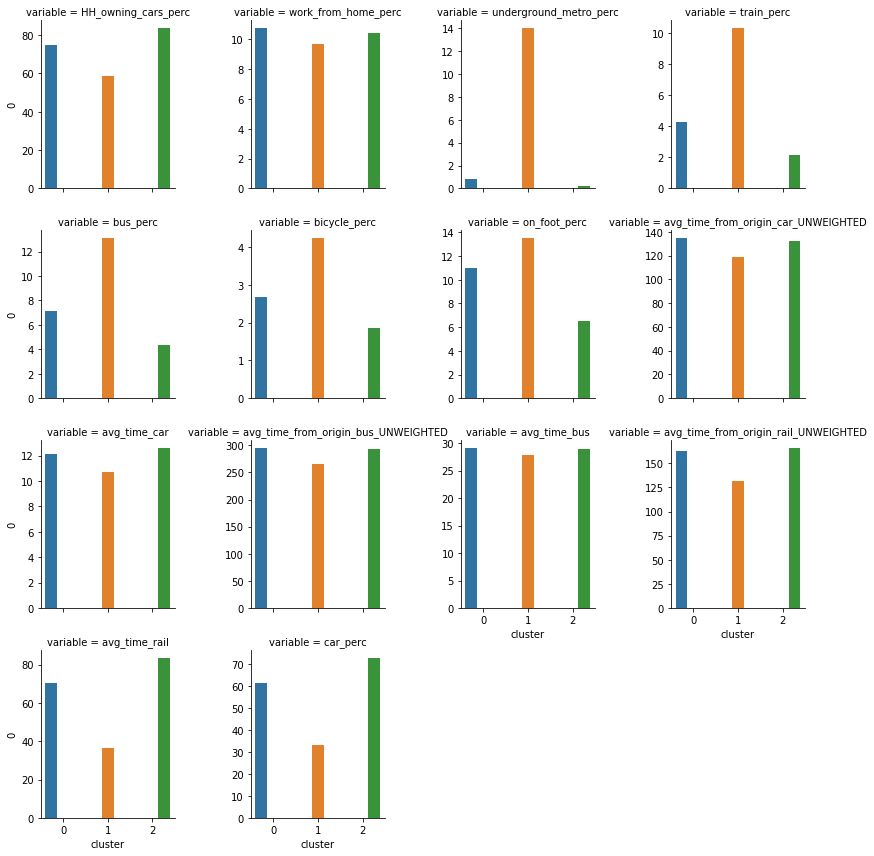

In [50]:
g = sns.catplot(data=y0, x='cluster', y=0, hue='cluster', col='variable', kind='bar',
                col_wrap=4, height = 3, sharey=False)

g.savefig("Plots/yj_idr_kmeans.png")